In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
def plot_feature_importances_adult(model):
    n_features = X.shape[1]
    plt.figure()
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.show()

In [3]:
#匯入資料
data = pd.read_csv("C:\\adult.csv")

In [4]:
#Preprocessing
data = data.drop(["education"], axis=1) #education、educational-num兩屬性意思相同，drop education屬性

data = data.drop(data[data["workclass"]=="?"].index)

for col in data[["workclass", "marital-status", "occupation", "relationship", "race", "gender", "native-country"]]:
    LE = LabelEncoder()
    data[col] = LE.fit_transform(data[col])

不限制深度的決策樹之訓練正確率: 0.9998841654117919
不限制深度的決策樹之測試正確率: 0.8087915906524195


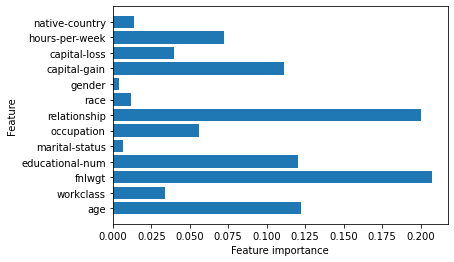

In [5]:
#Data mining(not use max_depth)
X = data.drop(["income"], axis=1)
y = data["income"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

#深度為的決策樹
treeX = DecisionTreeClassifier(random_state=0)
treeX.fit(X_train, y_train)

print("不限制深度的決策樹之訓練正確率:", treeX.score(X_train, y_train))
print("不限制深度的決策樹之測試正確率:", treeX.score(X_test, y_test))

plot_feature_importances_adult(treeX)

In [6]:
#Data mining(use max_depth)
X = data.drop(["income"], axis=1)
y = data["income"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

#深度為2的決策樹
tree_2 = DecisionTreeClassifier(random_state=0, max_depth=2)
tree_2.fit(X_train, y_train)

print("深度2的決策樹之訓練正確率:", tree_2.score(X_train, y_train))
print("深度2的決策樹之測試正確率:", tree_2.score(X_test, y_test), "\n")

#深度為4的決策樹
tree_4 = DecisionTreeClassifier(random_state=0, max_depth=4)
tree_4.fit(X_train, y_train)

print("深度4的決策樹之訓練正確率:", tree_4.score(X_train, y_train))
print("深度4的決策樹之測試正確率:", tree_4.score(X_test, y_test), "\n")

#深度為6的決策樹
tree_6 = DecisionTreeClassifier(random_state=0, max_depth=6)
tree_6.fit(X_train, y_train)

print("深度6的決策樹之訓練正確率:", tree_6.score(X_train, y_train))
print("深度6的決策樹之測試正確率:", tree_6.score(X_test, y_test), "\n")

深度2的決策樹之訓練正確率: 0.821209313100892
深度2的決策樹之測試正確率: 0.8232125792720006 

深度4的決策樹之訓練正確率: 0.839221591567242
深度4的決策樹之測試正確率: 0.840847884632091 

深度6的決策樹之訓練正確率: 0.8506312985057338
深度6的決策樹之測試正確率: 0.850838328555295 



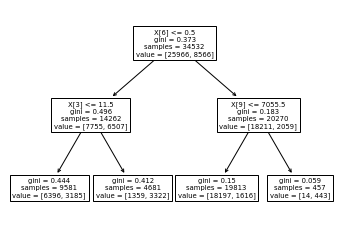

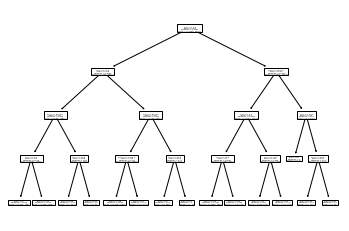

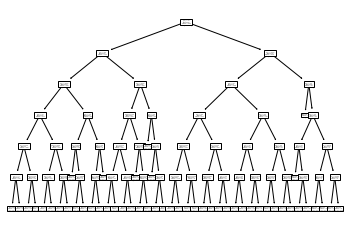

In [7]:
plt.figure()

tree.plot_tree(tree_2) 
plt.show()

tree.plot_tree(tree_4) 
plt.show()

tree.plot_tree(tree_6)
plt.show()

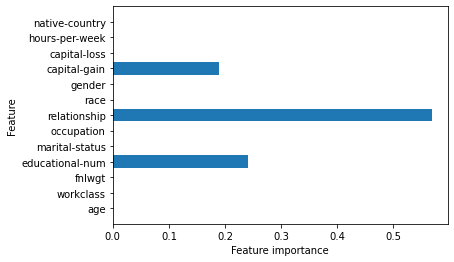

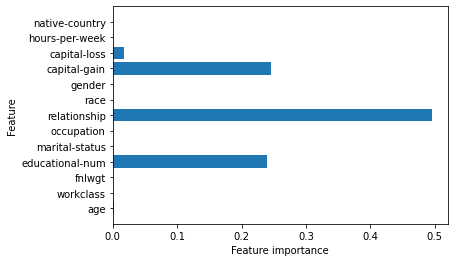

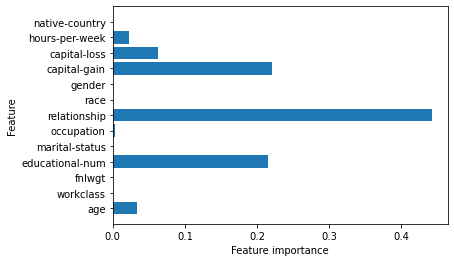

In [8]:
plot_feature_importances_adult(tree_2)

plot_feature_importances_adult(tree_4)

plot_feature_importances_adult(tree_6)

In [9]:
#匯出資料
X_test["Predict result"] = treeX.predict(X_test)
X_test["Actual result"] = y_test
X_test.to_csv("adult_result.csv")

C:\Users\open7\AppData\Local\Temp/ipykernel_6612/4078812852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Predict result"] = treeX.predict(X_test)
C:\Users\open7\AppData\Local\Temp/ipykernel_6612/4078812852.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Actual result"] = y_test
